# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [12]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(1.7978)


## Sampling from categorical probabilities with given probabilities

In [21]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

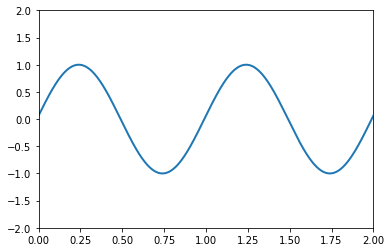

In [22]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

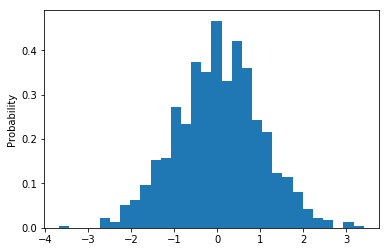

In [12]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

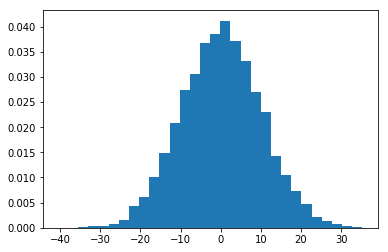

In [3]:
## Insert solution here
def animate():
    mean = 0
    variance = 10
    samples = 30
    data = []
    fig,ax = plt.subplots()
    plt.hist(data, density=True, bins=30)
        
    def get_value():
        return pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
        
    def run(i):
        if i != 0:
            [ data.append(get_value()) for i in range(samples)] 
            plt.cla()
            plt.hist(data, density=True, bins=30)

             

    anim = animation.FuncAnimation(fig,
                                   run,
                                   frames=300, 
                                   interval=10)
    return HTML(anim.to_jshtml())

animate()    

## Task 2

In [ ]:
## Insert solution here
size = 50000
people = []

def generate_people(number_of_ill_people): # 0 - healthy, 1 - ill
    people = ( number_of_ill_people * [1] )
    people += ( 50000 - number_of_ill_people ) * [0]
    return people

def test(is_ill):
    if not is_ill:
        return pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([0.98,0.02]))) #wedlug testu chory
    else:
        return pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([0.01,0.99])))

def bayes(number_of_ill_people):
    p_of_ill = number_of_ill_people/size
    return (p_of_ill * 0.99) / (0.99 * p_of_ill + 0.02 * (1 - p_of_ill))

x = []
r2 = []
r3 = []
for i in range (1,101):
    people = generate_people(i)
    prob = i/size
    people_illness = [test(person) for person in people]
    bayes_var = bayes(i)
    all_pp = 0
    correct = 0
    for p in range(size):
        if people_illness[p] :
            all_pp += 1
            if people[p]:
                correct += 1

#     print(all_pp)
#     print(correct)
    x.append(i) #liczba chorych
    r2.append(bayes_var) #wedlug bayesa
    r3.append(correct/all_pp) #wedlug symulacji

fig, ax = plt.subplots()
ax.plot(x, r3, label='test')
ax.plot(x, r2, label='Bayes')
plt.ylabel('Prawdopodobienstwo');
plt.xlabel('Chorzy ludzie');
ax.legend(loc=2)

tensor(1)